# PERSIAPAN DATA


In [9]:
import pandas as pd

# Load data
df = pd.read_csv('/content/drive/My Drive/DATA SCIENCE/DataPenumpang2021.csv')
df.head()

,periode_data,jenis,kode_trayek,trayek,jumlah_penumpang
0,202101,Angkutan Umum Integrasi,3E,Puri Kembangan - Sentraland Cengkareng,24385
1,202101,Angkutan Umum Integrasi,1R,Senen - Tanah Abang,13518
2,202101,Angkutan Umum Integrasi,1Q,Rempoa - Blok M,29449
3,202101,Angkutan Umum Integrasi,1P,Senen - Bundaran Senayan,8793
4,202101,Angkutan Umum Integrasi,1N,Tanah Abang - Blok M,9987


# Memisahkan Bulan & Tahun

In [10]:
# Memastikan periode data
df['periode_data'] = df['periode_data'].astype(str)

# Ambil tahun dan bulan dari periode_data
df['tahun'] = df['periode_data'].str[:4].astype(int)
df['bulan'] = df['periode_data'].str[4:6].astype(int)

print(df[['periode_data', 'tahun', 'bulan']].head())

  periode_data  tahun  bulan
0       202101   2021      1
1       202101   2021      1
2       202101   2021      1
3       202101   2021      1
4       202101   2021      1


In [11]:
data.head()

,periode_data,jenis,kode_trayek,trayek,jumlah_penumpang,tahun,bulan
0,202101,Angkutan Umum Integrasi,3E,Puri Kembangan - Sentraland Cengkareng,24385,2021,1
1,202101,Angkutan Umum Integrasi,1R,Senen - Tanah Abang,13518,2021,1
2,202101,Angkutan Umum Integrasi,1Q,Rempoa - Blok M,29449,2021,1
3,202101,Angkutan Umum Integrasi,1P,Senen - Bundaran Senayan,8793,2021,1
4,202101,Angkutan Umum Integrasi,1N,Tanah Abang - Blok M,9987,2021,1


In [19]:
# Pastikan tipe data sesuai
print(df.dtypes)


periode_data        object
jenis               object
kode_trayek         object
trayek              object
jumlah_penumpang     int64
tahun                int64
bulan                int64
dtype: object


# Pivot Data - Penumpang per Trayek per Bulan

In [26]:
# Buat pivot
pivot_df = df.pivot_table(
    index=['tahun', 'bulan'],
    columns='kode_trayek',
    values='jumlah_penumpang',
    aggfunc='sum'
)

# Simpan sebagai pivot_clean
pivot_clean = pivot_df.dropna(axis=1)


In [27]:
# Cek jumlah missing value per trayek
missing_per_trayek = pivot_df.isna().sum().sort_values(ascending=False)
print(missing_per_trayek.head(10))  # Top 10 trayek dengan data kosong terbanyak

kode_trayek
GR3         11
6Q          11
JAK. 10B    11
6F          11
12A         11
JAK.77      11
GR2         11
JAK.10B      9
2P           9
2Q           9
dtype: int64


In [28]:
# Hanya ambil trayek yang tidak mengandung NaN
clean_pivot_df = pivot_df.dropna(axis=1)

print("Jumlah trayek dengan data lengkap:", clean_pivot_df.shape[1])


Jumlah trayek dengan data lengkap: 117


# Visualisasi Tren Penumpang per Trayek

/tmp/ipython-input-29-2384136389.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


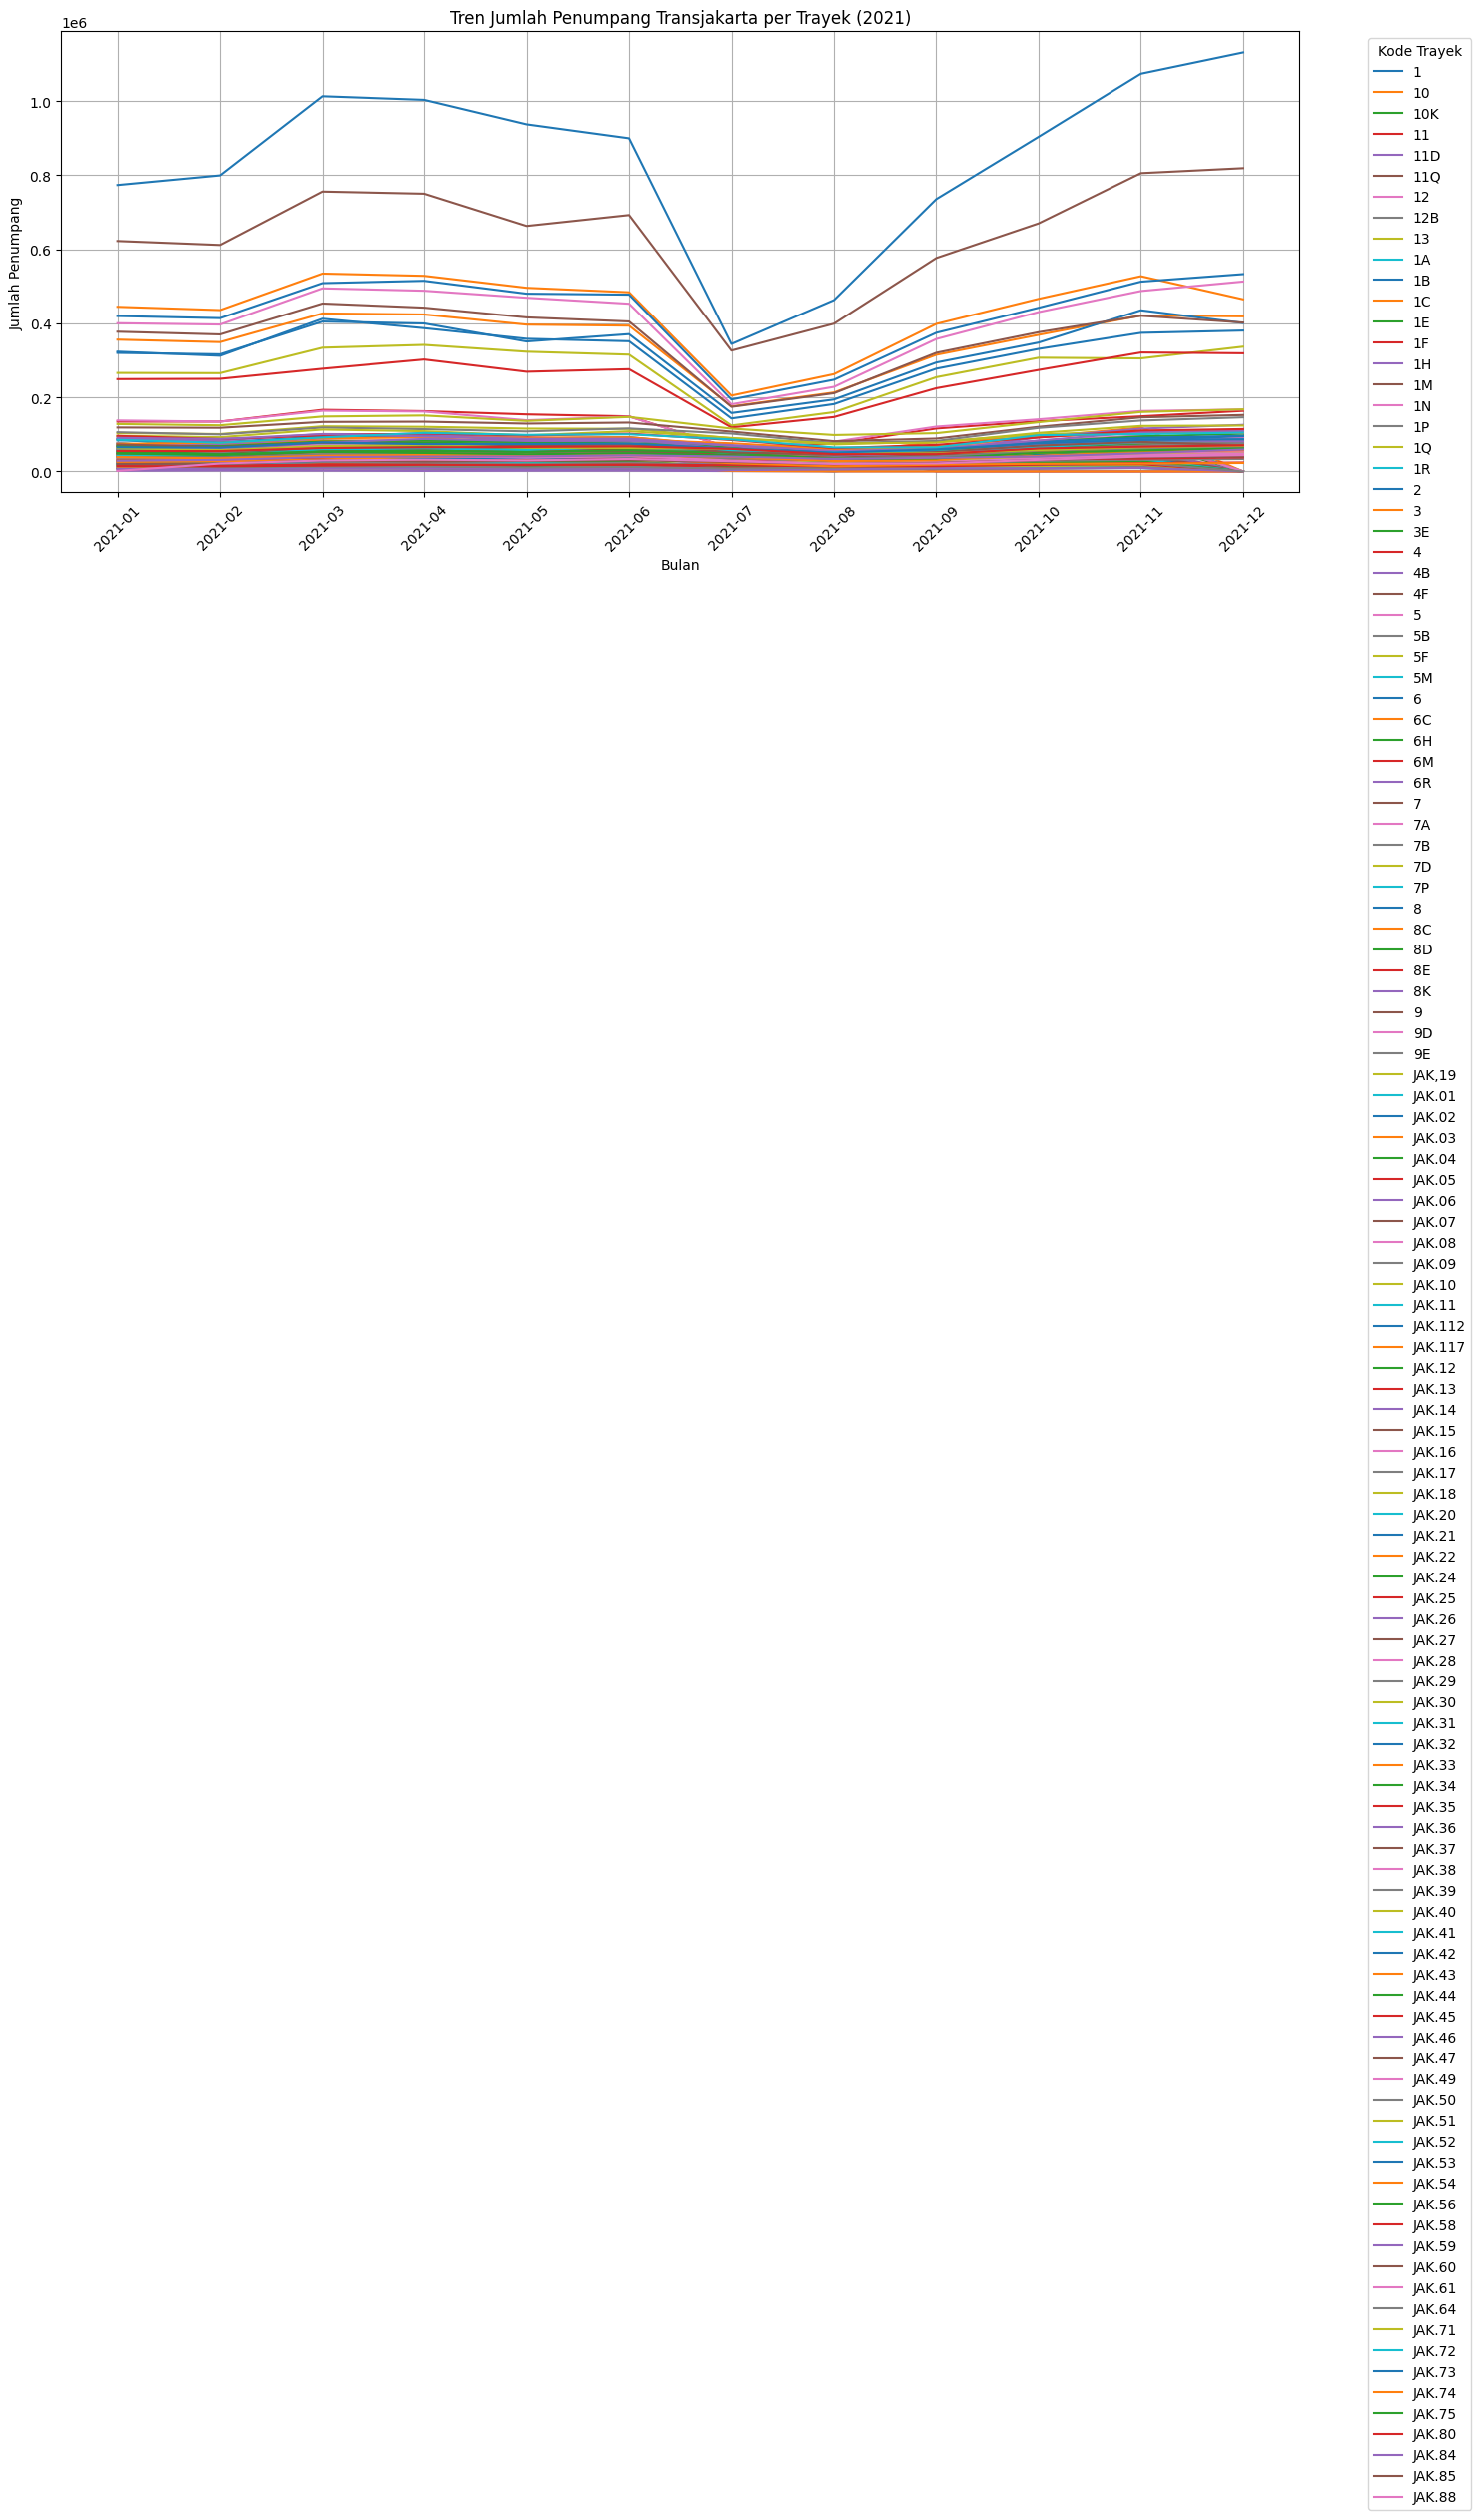

In [29]:
import matplotlib.pyplot as plt

# Reset index agar bisa membuat label waktu (misalnya: "2021-01")
pivot_clean_reset = pivot_clean.reset_index()
pivot_clean_reset['waktu'] = pivot_clean_reset['tahun'].astype(str) + '-' + pivot_clean_reset['bulan'].astype(str).str.zfill(2)

# Plot
plt.figure(figsize=(16, 6))

for trayek in pivot_clean.columns:
    plt.plot(pivot_clean_reset['waktu'], pivot_clean_reset[trayek], label=trayek)

plt.title('Tren Jumlah Penumpang Transjakarta per Trayek (2021)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=45)
plt.legend(title='Kode Trayek', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
# Hitung total penumpang sepanjang tahun untuk masing-masing trayek
total_penumpang = pivot_clean.sum().sort_values(ascending=False)

# Ambil top 5 trayek
top5_trayek = total_penumpang.head(5).index.tolist()

print("Top 5 kode trayek dengan penumpang terbanyak:", top5_trayek)


Top 5 kode trayek dengan penumpang terbanyak: ['1', '9', '3', '8', '5']


In [31]:
# Ambil nama trayek unik untuk top 5
trayek_mapping = df[df['kode_trayek'].isin(top5_trayek)][['kode_trayek', 'trayek']].drop_duplicates()

print("Top 5 trayek dari-mana ke-mana:")
print(trayek_mapping)


Top 5 trayek dari-mana ke-mana:
   kode_trayek                  trayek
86           9    Pinang Ranti - Pluit
87           8   Lebak Bulus - Harmoni
90           5  Kampung Melayu - Ancol
92           3  Kalideres - Pasar Baru
98           1           Blok M - Kota


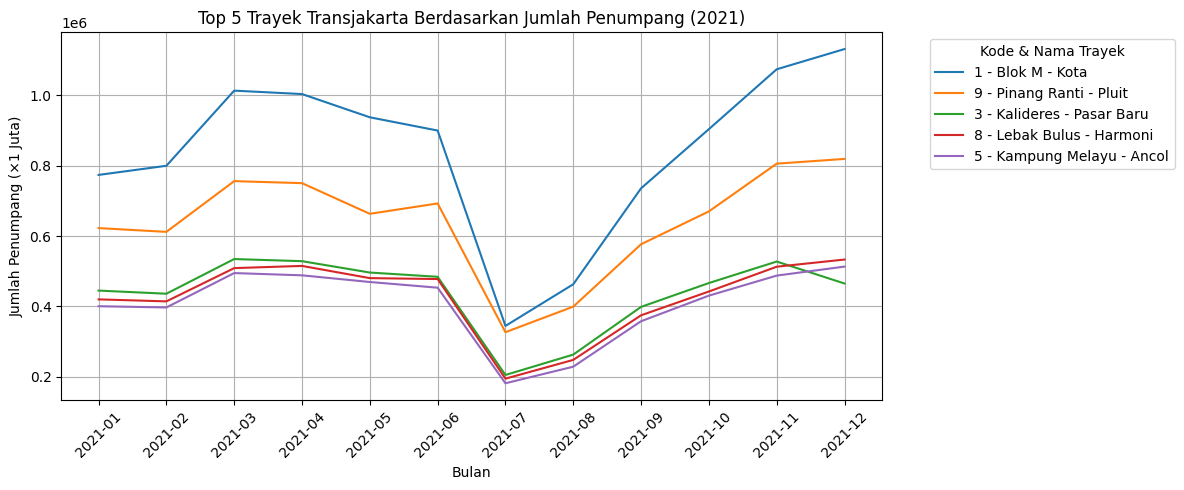

In [36]:
import matplotlib.pyplot as plt

# Buat mapping kode → nama trayek
trayek_dict = dict(
    df[df['kode_trayek'].isin(top5_trayek)][['kode_trayek', 'trayek']]
    .drop_duplicates()
    .values
)

# Siapkan data waktu
top5_df = pivot_clean[top5_trayek].reset_index()
top5_df['waktu'] = top5_df['tahun'].astype(str) + '-' + top5_df['bulan'].astype(str).str.zfill(2)

# Plot grafik
plt.figure(figsize=(12, 5))

for kode in top5_trayek:
    nama_trayek = trayek_dict.get(kode, kode)
    plt.plot(top5_df['waktu'], top5_df[kode], label=f"{kode} - {nama_trayek}")

plt.title('Top 5 Trayek Transjakarta Berdasarkan Jumlah Penumpang (2021)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang (×1 Juta)')
plt.xticks(rotation=45)
plt.legend(title='Kode & Nama Trayek', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# download gambar
plt.savefig('grafik_top5_trayek.png', dpi=300)

plt.show()



